# SeSiMe
### Sentence/Sequence Similarity Measure

### (2) Mass spec side
Import MS data and create documents.

Here: Use NOT Crusemann data, but other dataset where smilea are known for all spectra.
### here: GNPS Dataset of 35612 spectra with smiles.

In [1]:
# data locations
# Windows 
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\labeled_MS_data\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"
PATH_SESIME = ROOT + "\\SeSiMe\\"

PATH_NPLINKER = ROOT + "\\nplinker\\prototype\\"
mgf_file = PATH_MS_DATA + "GNPSLibraries_allSMILES.mgf"
#mgf_file = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs.mgf"

In [2]:
# import general packages
import sys
sys.path.insert(0, PATH_NPLINKER)
sys.path.insert(0, PATH_SESIME)

import helper_functions as functions
import MS_functions

import numpy as np
from metabolomics import load_spectra

In [3]:
# Import / Load data
results_file = "filtered_data_allSMILES.json"

spectra, spectra_dict, MS_documents, MS_documents_intensity = MS_functions.load_MGF_data(PATH_SAVE_DATA,
                  mgf_file, 
                 results_file = results_file,
                 num_decimals = 2,
                 min_frag = 0.0, max_frag = 1000.0,
                 min_loss = 10.0, max_loss = 300.0,
                 exp_intensity_filter = 0.01,
                 min_peaks = 10,
                 peaks_per_mz = 20/200)

Could not find file  C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\SeSiMe\data\ filtered_data_allSMILES.json
Loaded 35612 molecules
RuntimeError for  77  peaks. Use mean intensity as threshold.
RuntimeError for  91  peaks. Use mean intensity as threshold.


C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\SeSiMe\MS_functions.py:191: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)
C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe-env\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


RuntimeError for  184  peaks. Use mean intensity as threshold.
RuntimeError for  228  peaks. Use mean intensity as threshold.
RuntimeError for  109  peaks. Use mean intensity as threshold.
RuntimeError for  85  peaks. Use mean intensity as threshold.
RuntimeError for  105  peaks. Use mean intensity as threshold.
RuntimeError for  273  peaks. Use mean intensity as threshold.
Unclear TypeError for  127  peaks. Use mean intensity as threshold.
[] and y:  []
RuntimeError for  123  peaks. Use mean intensity as threshold.


C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe-env\lib\site-packages\scipy\optimize\minpack.py:780: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq


RuntimeError for  92  peaks. Use mean intensity as threshold.
RuntimeError for  180  peaks. Use mean intensity as threshold.
Take  24218 peaks out of  35612 .
  Created documents for  24218  of  24218  spectra. Created documents for  15400  of  24218  spectra. 24218  spectra.

### Spectra with few peaks were removed:
So only 24218 of the 35612 spectra had at least 10 peaks and were kept! 

## Documents

+ Peaks were removed using an exponential fit to the peak intensity distribution. 
+ Words were created using 2 decimals.

In [54]:
# Have a look at how a document looks like:
print(MS_documents[6])

['peak_210.06', 'peak_301.18', 'peak_183.12', 'peak_149.09', 'peak_125.10', 'peak_134.08', 'peak_129.07', 'peak_241.17', 'peak_157.11', 'peak_155.08', 'peak_161.13', 'peak_307.19', 'peak_127.04', 'peak_213.13', 'peak_286.19', 'peak_269.16', 'peak_137.06', 'peak_231.14', 'peak_257.20', 'peak_303.20', 'peak_159.08', 'peak_136.13', 'peak_302.18', 'peak_242.17', 'peak_211.11', 'peak_295.18', 'peak_283.17', 'peak_345.21', 'peak_363.22', 'peak_285.19', 'peak_271.17', 'peak_121.07', 'peak_199.15', 'peak_105.07', 'peak_189.13', 'peak_169.10', 'peak_201.13', 'peak_107.08', 'peak_243.18', 'peak_119.09', 'peak_121.10', 'peak_135.12', 'peak_185.13', 'peak_211.14', 'peak_131.08', 'peak_161.10', 'peak_171.11', 'peak_95.09', 'peak_91.06', 'peak_313.18', 'peak_173.14', 'peak_145.10', 'peak_331.19', 'peak_289.18', 'loss_85.07', 'loss_103.08', 'loss_117.10', 'loss_135.11', 'loss_141.10', 'loss_145.09', 'loss_146.11', 'loss_147.11', 'loss_153.12', 'loss_159.11', 'loss_162.10', 'loss_163.10', 'loss_165.12

In [5]:
len(MS_documents)  # number of spectra = number of documents

24218

#### Switch to general SeSiMe functionality
Once we have a corpus (e.g. through cells above), we can use SeSiMe to apply different similarity measuring methds. 

In [6]:
from Similarities import SimilarityMeasures

MS_measure = SimilarityMeasures(MS_documents)

Using TensorFlow backend.


In [7]:
MS_measure.preprocess_documents(0.2, create_stopwords = False)

Preprocess documents...


In [8]:
print("Number of unique words: ", len(MS_measure.dictionary))

Number of unique words:  74194


### Word2Vec -based approach
Create Word2Vec based document centroid vectors.

Since spectra are built from manyn more possible words (much larger "dictionary"), vectors are **reduced to 300** (instead of 200 as in previous examples, or 100 for BGCs) dimensions.

In [9]:
file_model_word2vec = PATH_SAVE_DATA + 'model_w2v_MS_gnps_allSMILES_d300_2dec.model'
MS_measure.build_model_word2vec(file_model_word2vec, size=300, window=50, 
                             min_count=1, workers=4, iter=200, 
                             use_stored_model=True)

Stored word2vec model not found!
Calculating new word2vec model...
 Epoch  200  of  200 .

In [10]:
MS_measure.get_vectors_centroid(weighted=True)
MS_measure.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  24218  of  24218  documents.6910  of  24218  documents. Calculated centroid vectors for  14250  of  24218  documents.Calculated distances between  24218  documents.


This has calculated (cosine) distances between all spectra in an all-vs-all fashion.
The "num_hits" closest candidates for each spectrum are listed in two matrices.

One stores the distances, the other the respective IDs.

In [11]:
MS_measure.Cdistances_ctr[1,:]

array([0.        , 0.56290508, 0.56345931, 0.57423487, 0.58913061,
       0.59392727, 0.59739428, 0.61346552, 0.62513814, 0.6261861 ,
       0.62663206, 0.62663206, 0.62775552, 0.63250376, 0.63831044,
       0.63837823, 0.64334481, 0.6478656 , 0.64835219, 0.64948491,
       0.65348312, 0.65493074, 0.65714232, 0.65849198, 0.66007969])

In [12]:
MS_measure.Cdistances_ctr_idx[1,:]

array([    1,   286,   591,  4298,  1252,  2205,  2540,  3245,  4564,
        1074,  9500,  9998, 16934,   572, 12588,   574,  5053,   776,
        1251,  1071, 16259,  2979,  3869,  1465,  6205])

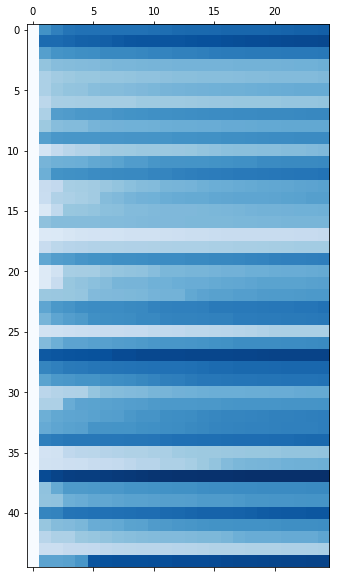

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(MS_measure.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

### Plot molecules from smiles to visually compare selected spectra

### In many cases it seems to work fine...

[0.         0.16056644 0.16056644 0.18526592 0.18704484 0.18967712
 0.20038169 0.20582334 0.20979871 0.21212465]


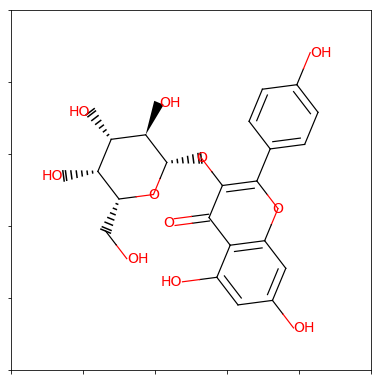

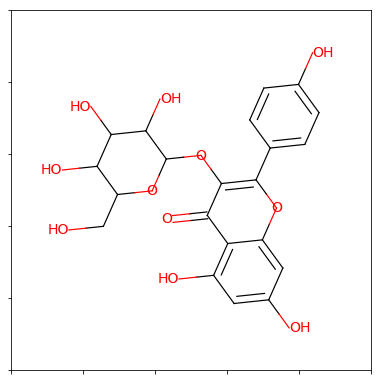

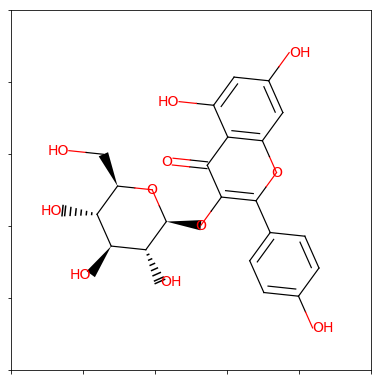

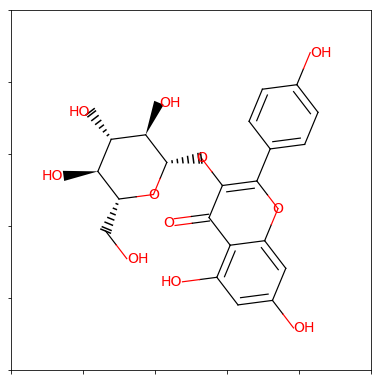

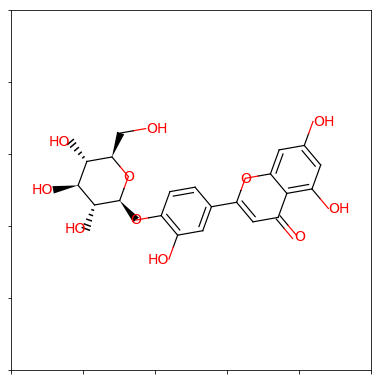

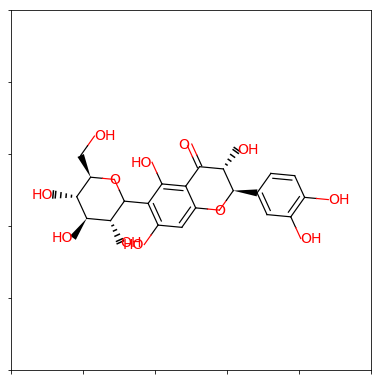

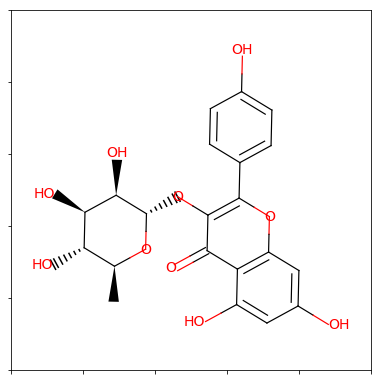

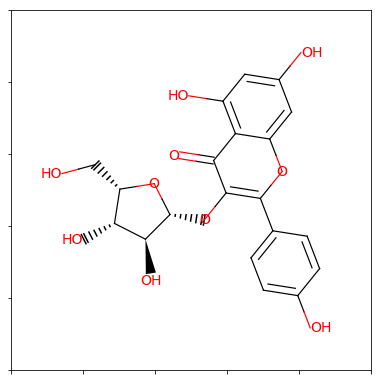

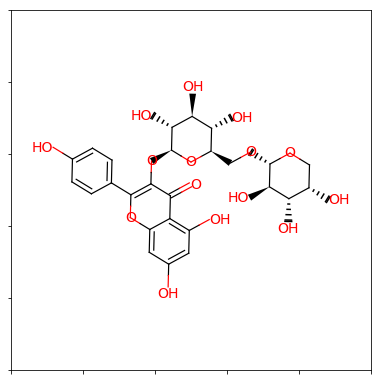

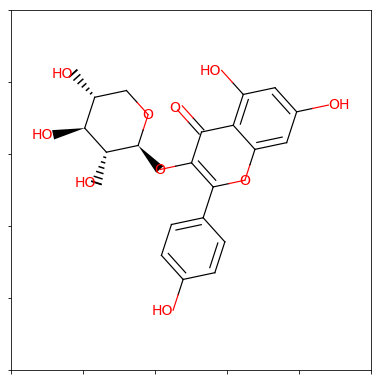

In [33]:
query_id = 43
print(MS_measure.Cdistances_ctr[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

### Some cases don't work out though!
Spectra 35, 36, 37, for instance, all have the same SMILES.

For spectrum 37, however, the method misses all those closely related candidates!
At first sight, the spectra of these candidates indeed seem to be quite different ?!?

In [35]:
print("1")
print(MS_documents[35])
print("2")
print(MS_documents[36]) 
print("3")
print(MS_documents[37])

1
['peak_88.35', 'peak_85.03', 'peak_84.05', 'peak_111.11', 'peak_99.08', 'peak_84.09', 'peak_119.09', 'peak_70.04', 'peak_72.05', 'peak_95.05', 'peak_131.09', 'peak_87.04', 'peak_99.05', 'peak_123.08', 'peak_109.06', 'peak_167.08', 'peak_98.07', 'peak_129.05', 'peak_186.12', 'peak_129.09', 'peak_125.09', 'peak_105.07', 'peak_85.06', 'peak_139.11', 'peak_71.05', 'peak_144.07', 'peak_122.10', 'peak_126.06', 'peak_81.07', 'peak_94.07', 'peak_105.04', 'peak_79.05', 'peak_107.09', 'peak_112.08', 'peak_83.05', 'peak_149.10', 'peak_203.13', 'peak_168.11', 'peak_91.05', 'peak_83.09', 'peak_97.06', 'peak_121.10', 'peak_185.12', 'peak_143.07', 'peak_125.06', 'peak_93.07', 'peak_111.08', 'peak_167.11', 'loss_184.11']
2
['peak_92.06', 'peak_181.13', 'peak_173.05', 'peak_155.04', 'peak_183.10', 'peak_370.23', 'peak_109.06', 'peak_115.07', 'peak_327.19', 'peak_75.04', 'peak_111.04', 'peak_99.08', 'peak_95.05', 'peak_123.08', 'peak_87.04', 'peak_122.10', 'peak_105.07', 'peak_107.09', 'peak_98.07', '

### Actually it seems they hardly share any peaks!
+ Check if smiles are indeed correct!

+ I manually inspected the mgf file for the respective 3 spectra. 
The first two (spectrum_id/Scan Number: 37 and 38) show a lot of overlap, which was also found by the algorithm (hence they were listed as close).

For the third one, however, indeed seems to contain vastly different peaks m/m values (spectrum_id/Scan Number: 39). --> **CHECK IF SMILES ARE CORRECT FOR THAT SPECTRUM**

In [44]:
print("1")
print(np.sort(np.round(np.array(spectra[35].peaks)[:,0], 2)))
print("2")
print(np.sort(np.round(np.array(spectra[36].peaks)[:,0], 2)))
print("3")
print(np.sort(np.round(np.array(spectra[37].peaks)[:,0], 2)))

1
[ 70.04  71.05  72.05  79.05  81.07  83.05  83.09  84.05  84.09  85.03
  85.06  87.04  88.35  91.05  93.07  94.07  95.05  97.06  98.07  99.05
  99.08 105.04 105.07 107.09 109.06 111.08 111.11 112.08 119.09 121.1
 122.1  123.08 125.06 125.09 126.06 129.05 129.09 131.09 139.11 143.07
 144.07 149.1  167.08 167.11 168.11 185.12 186.12 203.13]
2
[ 71.05  75.04  79.05  81.07  83.05  83.09  85.06  87.04  91.05  92.06
  93.07  94.07  95.05  97.06  98.07  99.08 105.04 105.07 107.09 109.06
 111.04 111.08 112.08 115.07 121.1  122.1  123.08 125.06 125.1  126.06
 129.09 139.11 143.07 144.07 149.1  155.04 167.11 168.11 173.05 181.13
 183.1  185.12 186.12 203.13 204.13 327.19 369.23 370.23 387.24 388.24]
3
[ 73.99  89.45 117.12 136.32 138.59 154.01 167.11 168.74 182.4  185.05
 197.5  205.32 207.1  208.1  209.78 209.82 210.14 213.86 218.08 219.09
 225.11 226.11 238.11 274.05 277.09 285.08 291.39 309.89 329.72 365.23
 366.23 397.97 408.23 408.33 408.78 408.96 409.07 409.1  409.14 409.22
 409.31 409.7

In [45]:
# the SMILES for all three spectra are the same!
print("1")
print(spectra[35].smiles)
print("2")
print(spectra[36].smiles)
print("3")
print(spectra[37].smiles)

1
CC(O)CC1CCC(O1)C(C)C(=O)OC(C)CC2CCC(O2)C(C)C(O)=O
2
CC(O)CC1CCC(O1)C(C)C(=O)OC(C)CC2CCC(O2)C(C)C(O)=O
3
CC(O)CC1CCC(O1)C(C)C(=O)OC(C)CC2CCC(O2)C(C)C(O)=O


[1.11022302e-16 6.51812608e-01 6.72177797e-01 6.86088858e-01
 6.88612782e-01 6.90996603e-01 6.94845395e-01 7.00856509e-01
 7.02702893e-01 7.09088189e-01]


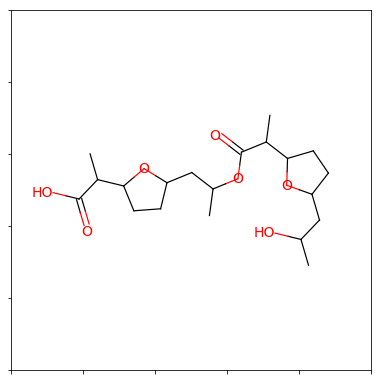

In [31]:
query_id = 37
print(MS_measure.Cdistances_ctr[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure, num_candidates = 1, 
                   sharex=True, labels=False, dist_method = "centroid")

In [32]:
print(MS_measure.Cdistances_ctr_idx[35, :10])
print(MS_measure.Cdistances_ctr_idx[36, :10])
print(MS_measure.Cdistances_ctr_idx[37, :10])

[  35  532   36  400 4054 1333  533 5427 1334 5740]
[  36   35  532  533 5740 3671 4840 3672 1334 1333]
[   37  3673 22315  1335 21826  4841  5741  6069 22145 21909]


In [47]:
print(spectra[35].spectrum_id)
print(spectra[36].spectrum_id)
print(spectra[37].spectrum_id)

37
38
39


[2.22044605e-16 1.32000927e-01 1.38451167e-01 1.95506179e-01
 2.07270622e-01 2.10092427e-01 2.20194126e-01 2.25924788e-01
 2.36068591e-01 2.36609458e-01]


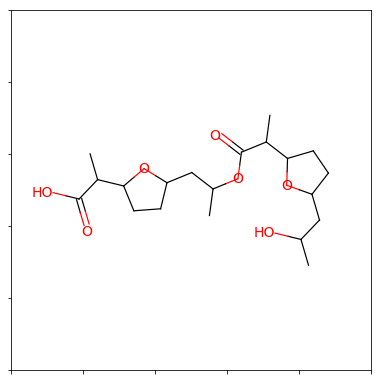

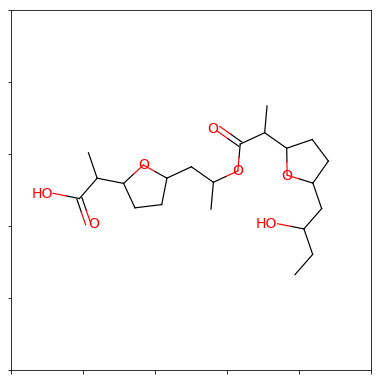

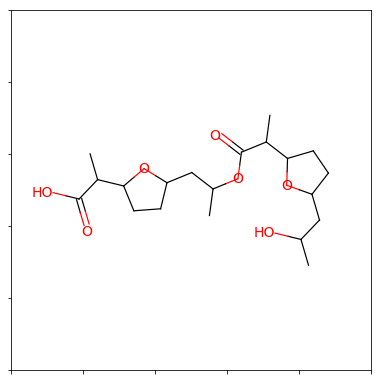

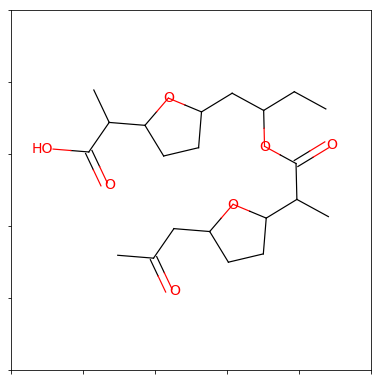

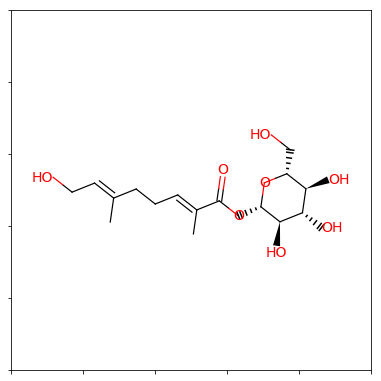

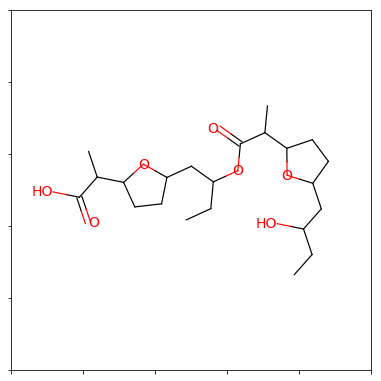

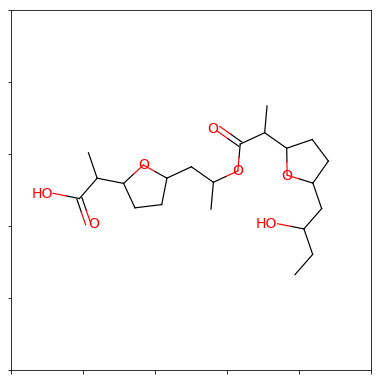

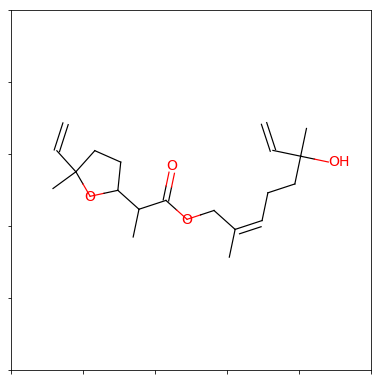

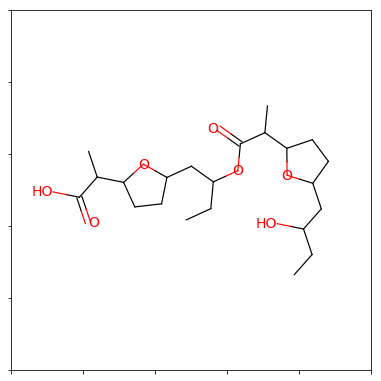

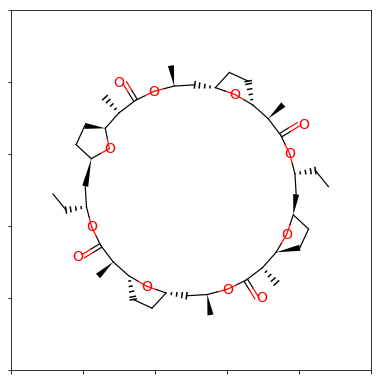

In [18]:
query_id = 35
print(MS_measure.Cdistances_ctr[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

### Try different similarity measuring methods...

#### A) Autoencoder
Will train a deep autoencoder to generate 100 dimensional (or = encoding_dim) vectors representing each document. 

In [81]:
file_model_ae = PATH_SAVE_DATA + 'model_autoencoder_MS_uniquesmiles2.h5'
file_model_encoder = PATH_SAVE_DATA + 'model_encoder_MS_uniquesmiles2.h5'
MS_measure.build_autoencoder(file_model_ae, file_model_encoder, 
                             epochs = 8, batch_size = 1024, encoding_dim = 300,
                            layer_factors = (1, 1, 1))

No stored model found!
Creating new autoencoder model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 300)               16956300  
_________________________________________________________________
dense_11 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_12 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_16 (Dense)   

In [82]:
MS_measure.get_autoencoder_distances(num_hits=25, method='cosine')

[0.00000000e+00 1.08270215e-07 1.39865922e-07 2.50640856e-07
 2.71289795e-07 2.73772700e-07 2.87246752e-07 3.04670363e-07
 3.12957884e-07 3.16611003e-07]


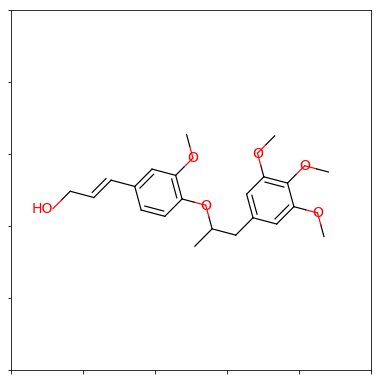

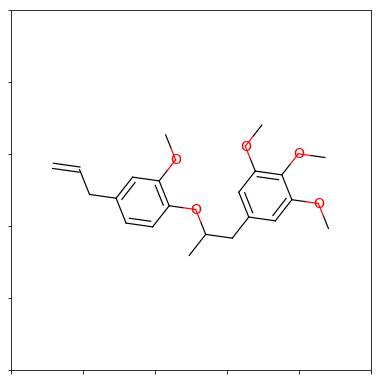

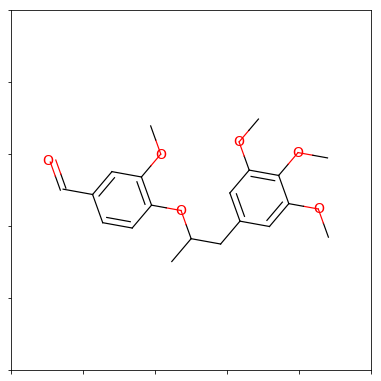

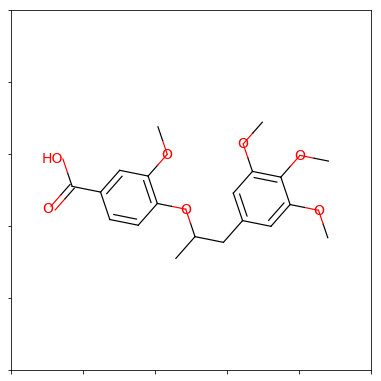

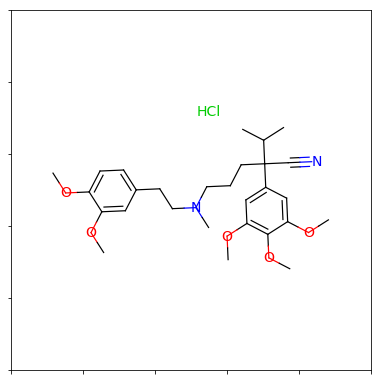

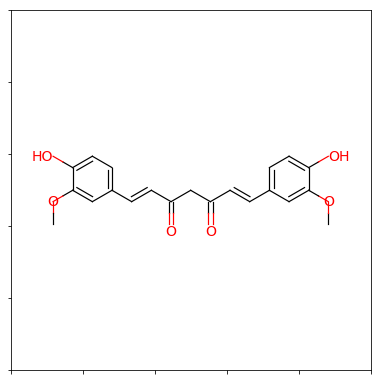

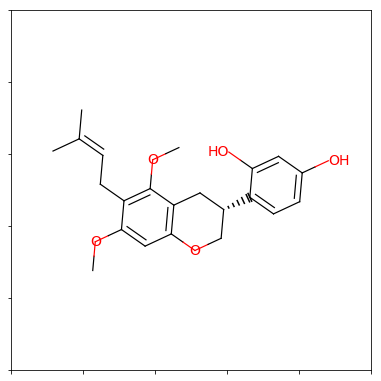

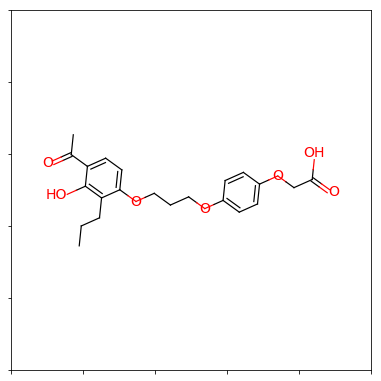

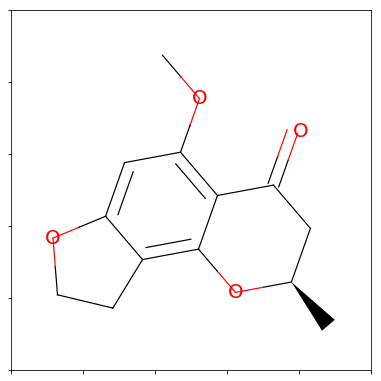

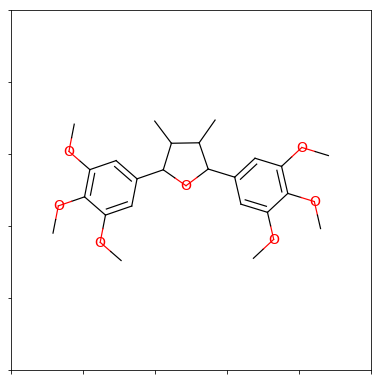

In [83]:
query_id = 110
print(MS_measure.Cdistances_ae[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "autoencoder")

#### B) PCA
Will calulate 300 dimensional representations of each document using PCA.

In [69]:
MS_measure.get_vectors_pca(300)

In [70]:
MS_measure.get_pca_distances(num_hits=25, method='cosine')

[1.11022302e-16 1.34778035e-01 1.87372251e-01 2.35544399e-01
 3.17293470e-01 3.22967926e-01 3.68596064e-01 4.07776146e-01
 4.14090705e-01 4.18957916e-01]


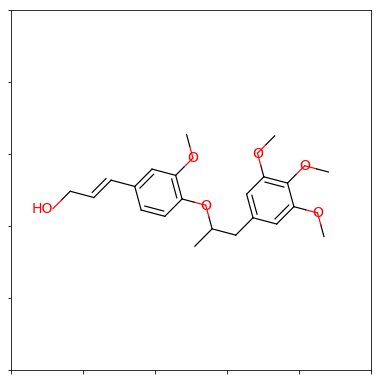

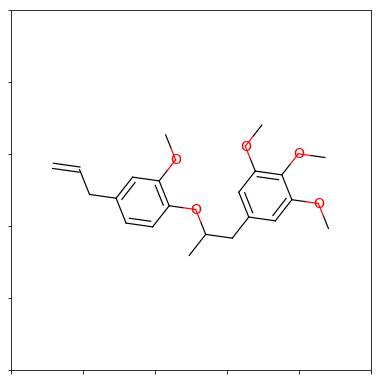

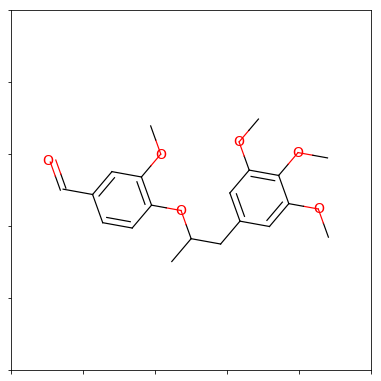

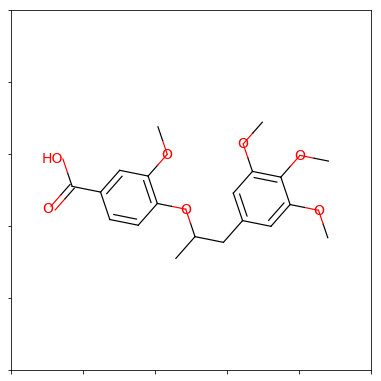

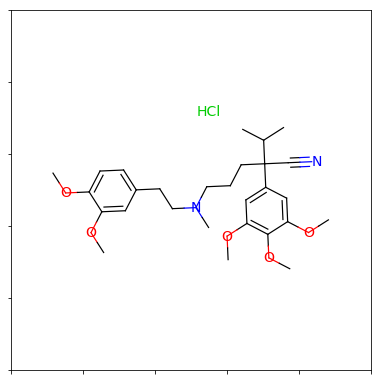

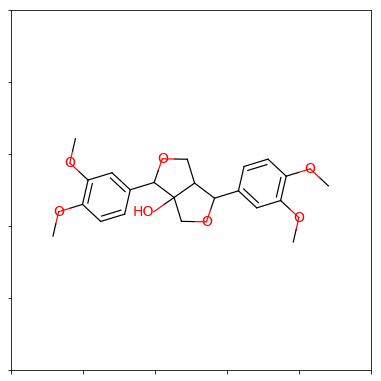

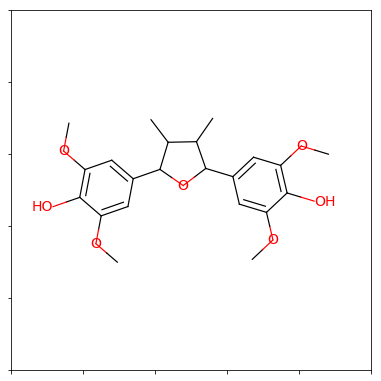

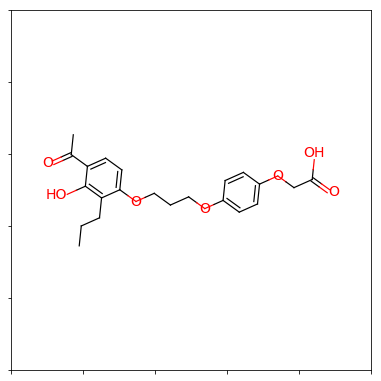

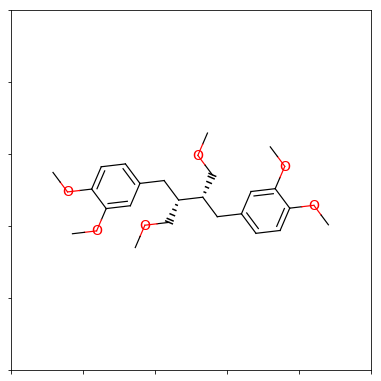

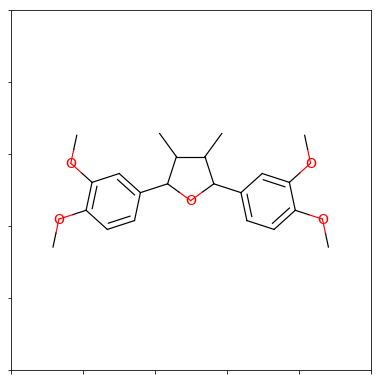

In [84]:
query_id = 110
print(MS_measure.Cdistances_pca[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")